# **Problem** statement 7:


Create a Linear Regression Model using Python/R to predict home prices.The
objective is to predict the value of prices of the house using the given features in
the dataset.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sb

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy import stats

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error

In [39]:
from sklearn.metrics import r2_score

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [12]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
df.shape

(506, 14)

In [14]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [15]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [18]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

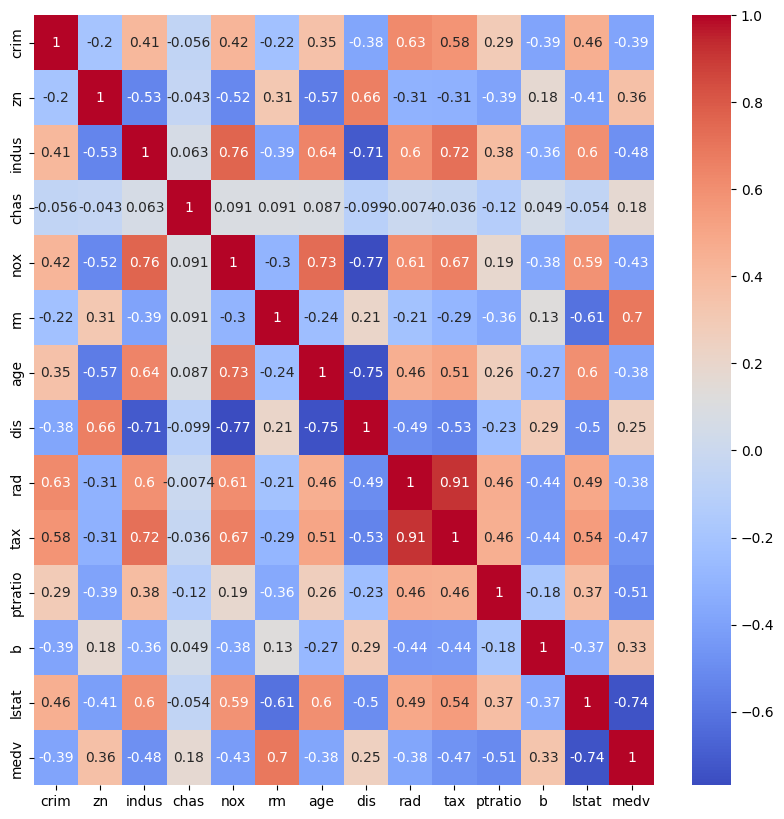

In [19]:
plt.figure(figsize=(10,10))
sb.heatmap(data=df.corr(), annot= True, cmap='coolwarm')

Dealing with Outliers


<Axes: xlabel='lstat'>

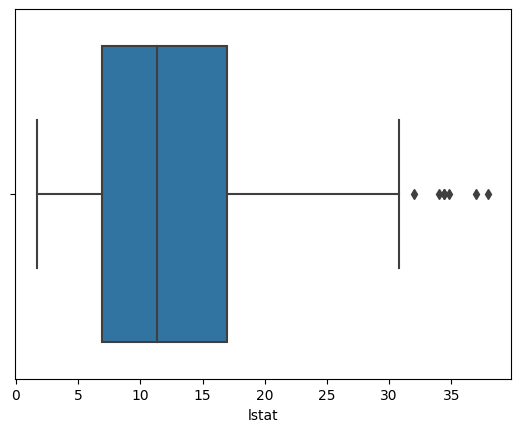

In [20]:
sb.boxplot(x = df["lstat"])

<Axes: xlabel='rm'>

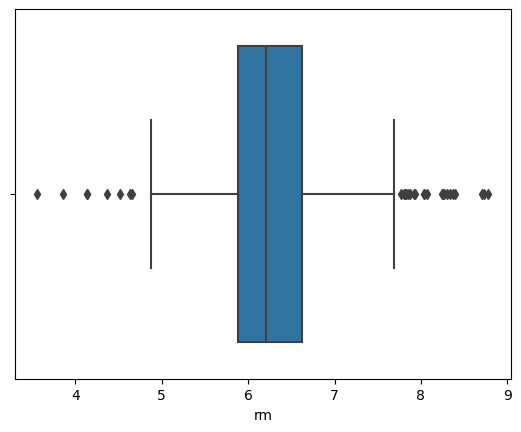

In [21]:
sb.boxplot(x = df["rm"])

<Axes: xlabel='indus'>

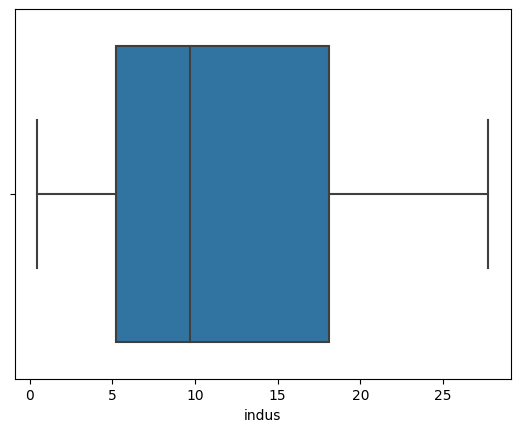

In [22]:
sb.boxplot(x = df["indus"])

<Axes: xlabel='ptratio'>

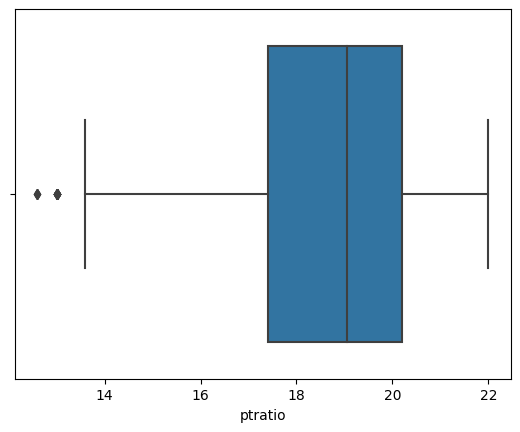

In [23]:
sb.boxplot(x=df['ptratio'])

<Axes: xlabel='tax'>

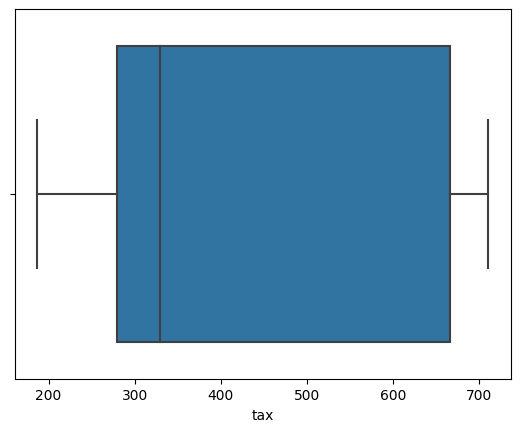

In [24]:
sb.boxplot(x=df['tax'])

In [25]:
cols = df[["lstat", "rm", "ptratio", "indus", "tax"]].columns
cols


Index(['lstat', 'rm', 'ptratio', 'indus', 'tax'], dtype='object')

In [26]:
result =  stats.iqr(df[cols], axis=0)
result

array([ 10.005,   0.738,   2.8  ,  12.91 , 387.   ])

In [27]:
df.drop(df[df["lstat"] < (df["lstat"].quantile(0.25) - 1.5 * result[0])].index, inplace = True)
df.drop(df[df["rm"] < (df["rm"].quantile(0.25) - 1.5 * result[1])].index, inplace = True)
df.drop(df[df["ptratio"] < (df["ptratio"].quantile(0.25) - 1.5 * result[2])].index, inplace = True)
df.drop(df[df["indus"] < (df["indus"].quantile(0.25) - 1.5 * result[3])].index, inplace = True)
df.drop(df[df["tax"] < (df["tax"].quantile(0.25) - 1.5 * result[4])].index, inplace = True)

In [28]:
df.drop(df[df["lstat"] > (df["lstat"].quantile(0.75) + 1.5 * result[0])].index, inplace = True)
df.drop(df[df["rm"] > (df["rm"].quantile(0.75) + 1.5 * result[1])].index, inplace = True)
df.drop(df[df["ptratio"] > (df["ptratio"].quantile(0.75) + 1.5 * result[2])].index, inplace = True)
df.drop(df[df["indus"] > (df["indus"].quantile(0.75) + 1.5 * result[3])].index, inplace = True)
df.drop(df[df["tax"] > (df["tax"].quantile(0.75) + 1.5 * result[4])].index, inplace = True)

<Axes: >

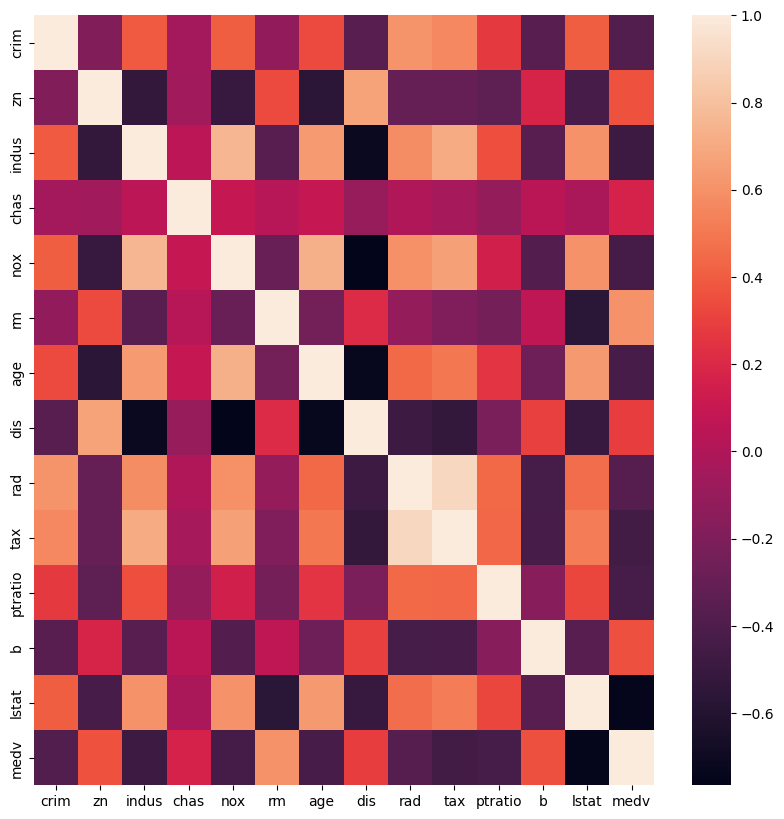

In [29]:
plt.figure(figsize=(10, 10))
sb.heatmap(data=df.corr())

<Axes: xlabel='ptratio'>

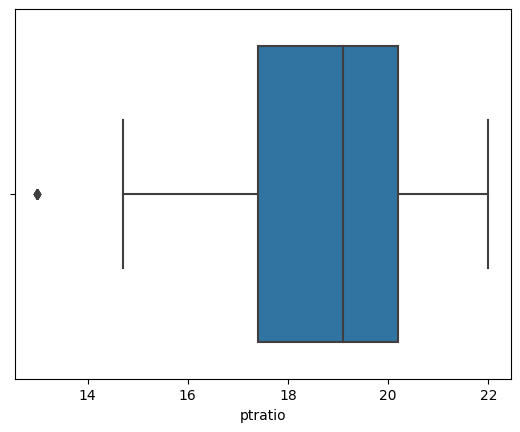

In [30]:
sb.boxplot(x=df['ptratio'])

<Axes: xlabel='lstat'>

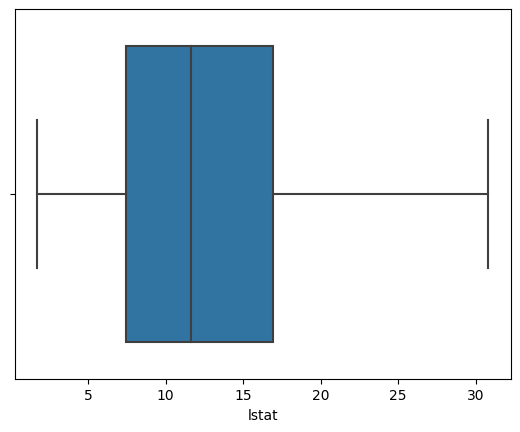

In [31]:
sb.boxplot(x = df["lstat"])

In [32]:
X =  df[["lstat", "rm", "ptratio", "indus", "tax"]]
Y = df["medv"]

print("X: \n", X)
print("\nY: \n", Y)

X: 
      lstat     rm  ptratio  indus  tax
0     4.98  6.575     15.3   2.31  296
1     9.14  6.421     17.8   7.07  242
2     4.03  7.185     17.8   7.07  242
3     2.94  6.998     18.7   2.18  222
4     5.33  7.147     18.7   2.18  222
..     ...    ...      ...    ...  ...
501   9.67  6.593     21.0  11.93  273
502   9.08  6.120     21.0  11.93  273
503   5.64  6.976     21.0  11.93  273
504   6.48  6.794     21.0  11.93  273
505   7.88  6.030     21.0  11.93  273

[469 rows x 5 columns]

Y: 
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 469, dtype: float64


In [33]:
model = LinearRegression()

In [34]:
x_train, x_test , y_tain, y_test = train_test_split(X, Y,test_size = 0.5,random_state = 5)

In [35]:
model.fit(x_train, y_tain)

LinearRegression()

In [36]:
prex = model.predict(x_test)


In [37]:
rmsr = np.sqrt(mean_squared_error(y_test, prex))
rmsr

4.902351592528913

In [38]:
r2 = r2_score(y_test, prex) * 100
r2

56.48446885654894